In [941]:
def standard_scaler(df, col_range):
    x = df.iloc[:, col_range].values #returns a numpy array
    gdp_mean = df['GDP per capita (PWT)'].mean()
    gdp_std = df['GDP per capita (PWT)'].std()
    std_scaler = StandardScaler()
    std_scaler.fit(x)
    x_scaled = std_scaler.transform(x)
    df_scaled = df
    df_scaled.iloc[:, col_range] = x_scaled
    return [df_scaled, gdp_mean, gdp_std]

In [942]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
sns.set()

# pd.option_context('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')




df = pd.read_csv('../outputs/db.csv', index_col=0)

col_range = list(range(6,16)) + list(range(17,26)) + list(range(27,43))

# df_2017 = df.loc[((df['Year'] == 2012) & (df['Subject'] == 'All')), ['Country','GDP per capita (World Bank)', 'GDP per capita (PWT)', 'Documents', 'H index', 'Citations', 'Self-citations', 'Population', 'Citations per Document', 'Avg. Adult Schooling', 'MAX TAMS', 'REAL TAMS', 'Documents / M-TAMS', 'Documents / R-TAMS', 'Citations / M-TAMS', 'Citations / R-TAMS', 'Gov. Effectiveness']]


for i, column in enumerate(df.columns.values):
    print(f"{i} - {column}")

0 - Independent
1 - Sink OFC
2 - Conduit OFC
3 - Code
4 - Country
5 - Year
6 - Population
7 - Population 25 Years Before
8 - Population 25+
9 - Population 25+ / Max Population 25+
10 - Documents
11 - Citable documents
12 - Citations
13 - Self-citations
14 - Citations per Document
15 - H index
16 - Subject
17 - Avg. Adult Schooling
18 - GDP per capita (World Bank)
19 - GDP per capita (PWT)
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)


In [943]:
display(df[df['Subject'] == 'All'].corr())

,Year,Population,Population 25 Years Before,Population 25+,Population 25+ / Max Population 25+,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Avg. Adult Schooling,GDP per capita (World Bank),GDP per capita (PWT),MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total"
Year,1.000000,0.016270,0.024655,0.029596,0.051322,0.089283,0.086233,-0.021295,-0.012465,-0.270171,-0.013507,0.188713,0.065372,0.100491,0.037742,0.040851,0.190098,0.183918,-0.020191,-0.033807,-0.007683,0.135908,0.085108,-0.556106,0.021716,-0.047849,0.034073,-0.193568,0.033869,0.049261,0.062571,0.136871,0.061196,0.013378,0.049785,0.062214,0.049143
Population,0.016270,1.000000,0.990967,0.988672,-0.003546,0.493852,0.517889,0.279741,0.314443,-0.053912,0.314694,-0.042857,-0.055904,-0.053790,0.932204,0.929217,-0.043394,-0.038562,-0.047890,-0.045466,0.006693,0.212131,0.137009,0.109310,0.639826,0.373575,0.581581,-0.125617,0.422767,0.464526,0.076971,-0.076810,0.571122,-0.076624,0.570786,0.579558,0.668051
Population 25 Years Before,0.024655,0.990967,1.000000,0.999514,-0.005985,0.549095,0.575946,0.311316,0.347716,-0.054477,0.342398,-0.006699,-0.033827,-0.034517,0.966696,0.964562,-0.026777,-0.018409,-0.033881,-0.029809,0.028942,0.248360,0.162001,0.104245,0.703918,0.427037,0.663939,-0.126606,0.464411,0.543564,0.106130,-0.050589,0.627635,-0.047339,0.629765,0.647881,0.733483
Population 25+,0.029596,0.988672,0.999514,1.000000,0.000863,0.553773,0.580783,0.313202,0.352031,-0.056177,0.337260,0.000405,-0.028550,-0.025390,0.968685,0.967675,-0.018896,-0.013689,-0.028722,-0.026134,0.041084,0.252105,0.167150,0.109560,0.712678,0.433172,0.671957,-0.120949,0.472865,0.551026,0.107971,-0.050621,0.634868,-0.043373,0.636278,0.654137,0.742248
Population 25+ / Max Population 25+,0.051322,-0.003546,-0.005985,0.000863,1.000000,0.021728,0.021525,0.015947,0.010660,-0.033759,0.068654,0.111824,0.582652,0.579031,-0.000959,0.007532,0.352089,0.130478,0.212589,0.083330,0.230840,0.135377,0.067431,0.051863,0.031951,0.045711,0.012853,0.130298,0.038657,0.010067,0.099053,0.071343,0.024849,0.066390,0.067894,0.001778,0.020253
Documents,0.089283,0.493852,0.549095,0.553773,0.021728,1.000000,0.997957,0.803705,0.797990,-0.007796,0.729121,0.254838,0.236607,0.199783,0.692898,0.700624,0.245062,0.282292,0.208265,0.222208,0.268924,0.582668,0.806279,0.056417,0.722221,0.689786,0.517984,-0.064939,0.918807,0.684625,0.409801,0.263710,0.987667,0.363787,0.805200,0.557478,0.650617
Citable documents,0.086233,0.517889,0.575946,0.580783,0.021525,0.997957,1.000000,0.800830,0.797410,-0.007955,0.726765,0.253196,0.234105,0.197303,0.719244,0.726730,0.239923,0.276935,0.206677,0.220779,0.267721,0.578398,0.778532,0.058928,0.755462,0.697875,0.559310,-0.066987,0.911168,0.712883,0.413781,0.259408,0.994476,0.362711,0.821293,0.596225,0.681122
Citations,-0.021295,0.279741,0.311316,0.313202,0.015947,0.803705,0.800830,1.000000,0.974527,0.076182,0.711118,0.244198,0.244229,0.203699,0.469420,0.475564,0.229527,0.266454,0.286015,0.305816,0.269113,0.435080,0.708707,0.139625,0.532961,0.526764,0.226056,-0.006778,0.776937,0.430569,0.376508,0.250391,0.831352,0.404174,0.542951,0.265258,

In [944]:
def rearrange_db(df, year, step, subjects=['All']):

    years = sorted(df[df['Year'] <= year]['Year'].unique(), reverse=True)
    last_year = years[-1] + step
    df_rearranged = pd.DataFrame()

    for year in years:

        if year >= last_year:
            
            df_economic = df.loc[((df['Year'] == year) & (df['Subject'].isin(subjects))), ['Year', 'Country','GDP per capita (World Bank)', 'GDP per capita (PWT)']]

            df_science = df.loc[((df['Year'] == (year - step)) & (df['Subject'].isin(subjects)))].drop(['Year','Country','GDP per capita (World Bank)', 'GDP per capita (PWT)'], axis=1)

            df_merged = df_economic.join(df_science, how='left')
            df_merged = df_merged[(df_merged['GDP per capita (World Bank)'].notna()) | (df_merged['GDP per capita (PWT)'].notna())]
            df_rearranged = df_rearranged.append(df_merged)

    return df_rearranged

subjects = ['All']
df_rearranged = rearrange_db(df, 2017, 3, subjects)
col_range_rearranged = [2,3] + list(range(8,18)) + list(range(19,26)) + list(range(27,43))
df_rearranged, df_rearranged_mean, df_rearranged_std = standard_scaler(df_rearranged, col_range_rearranged)

df_normal = df_rearranged[(df_rearranged.iloc[:, col_range_rearranged] <= 2.5) & (df_rearranged.iloc[:, col_range_rearranged] >= -2.5)]
df_normal.describe()
# df_rearranged.sort_values(by='GDP per capita (PWT)', inplace=True, ascending=False)
print (set(df['Subject'].values))
df_rearranged.corr()


{'Social Sciences', 'Computer Science', 'Economics, Econometrics and Finance', 'Decision Sciences', 'Pharmacology, Toxicology and Pharmaceutics', 'Neuroscience', 'Immunology and Microbiology', 'Earth and Planetary Sciences', 'All', 'Chemical Engineering', 'Biochemistry, Genetics and Molecular Biology', 'Agricultural and Biological Sciences', 'Nursing', 'Business, Management and Accounting', 'Multidisciplinary', 'Dentistry', 'Environmental Science', 'Veterinary', 'Mathematics', 'Arts and Humanities', 'Energy', 'Physics and Astronomy', 'Medicine', 'Engineering', 'Psychology', 'Materials Science', 'Health Professions', 'Chemistry'}


,Year,GDP per capita (World Bank),GDP per capita (PWT),Population,Population 25 Years Before,Population 25+,Population 25+ / Max Population 25+,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total"
Year,1.000000,0.053989,0.093394,0.012377,0.019727,0.022846,0.040963,0.083218,0.078663,0.022609,0.016154,-0.167756,-0.015310,0.162149,0.029337,0.031872,0.160608,0.157860,0.042880,0.033715,-0.005718,0.132404,0.072421,-0.455111,-0.012791,-0.074542,0.036830,-0.165072,0.038785,0.042872,0.039391,0.106664,0.057192,0.036256,0.032558,0.049002,0.069338
GDP per capita (World Bank),0.053989,1.000000,0.966183,-0.053209,-0.030484,-0.025598,0.573688,0.238103,0.237066,0.250463,0.179470,0.090029,0.477430,0.543465,0.032019,0.036505,0.695439,0.622378,0.609245,0.560525,0.698909,0.418308,0.299881,-0.130046,0.203707,0.298737,0.032638,0.128417,0.184343,0.137084,0.558748,0.663475,0.219896,0.584795,0.358090,0.087512,0.071295
GDP per capita (PWT),0.093394,0.966183,1.000000,-0.056317,-0.034854,-0.025821,0.568712,0.220155,0.218846,0.230517,0.166912,0.114107,0.407561,0.579284,0.041503,0.046816,0.724133,0.655563,0.640450,0.594771,0.688457,0.431710,0.319319,-0.167536,0.191081,0.268477,0.027581,0.153433,0.210159,0.159676,0.495746,0.617522,0.241038,0.522124,0.314403,0.072669,0.072232
Population,0.012377,-0.053209,-0.056317,1.000000,0.991715,0.989266,0.002117,0.434224,0.456504,0.272107,0.298418,-0.068965,0.306390,-0.041561,0.928669,0.925751,-0.040961,-0.038287,-0.044683,-0.043701,-0.000948,0.199376,0.133455,0.098534,0.662482,0.325416,0.552652,-0.120198,0.410057,0.382287,0.069457,-0.074709,0.520884,-0.073524,0.553868,0.718627,0.670323
Population 25 Years Before,0.019727,-0.030484,-0.034854,0.991715,1.000000,0.999461,-0.000489,0.486935,0.511637,0.309835,0.335655,-0.067522,0.339246,-0.004627,0.963240,0.961149,-0.022699,-0.016982,-0.028896,-0.026229,0.021924,0.236950,0.160255,0.097828,0.724286,0.376189,0.629287,-0.118240,0.452016,0.448865,0.098920,-0.046838,0.574492,-0.039758,0.614330,0.785183,0.738163
Population 25+,0.022846,-0.025598,-0.025821,0.989266,0.999461,1.000000,0.006081,0.492429,0.517254,0.313949,0.341324,-0.065300,0.338503,-0.000349,0.965467,0.964552,-0.017439,-0.012655,-0.025010,-0.022462,0.032259,0.240888,0.165238,0.102305,0.733823,0.380354,0.637588,-0.114993,0.460605,0.456132,0.101110,-0.045419,0.582135,-0.033717,0.621021,0.793579,0.746779
Population 25+ / Max Population 25+,0.040963,0.573688,0.568712,0.002117,-0.000489,0.006081,1.000000,0.023812,0.023837,0.021011,0.014575,-0.032544,0.080451,0.105332,0.000748,0.008937,0.307250,0.118464,0.190703,0.083940,0.223528,0.141754,0.058456,0.073997,0.037894,0.034430,0.013409,0.122353,0.050338,0.019170,0.128233,0.109953,0.025819,0.082655,0.062630,0.003893,0.017405
Documents,0.083218,0.238103,0.220155,0.434224,0.486935,0.492429,0.023812,1.000000,0.998023,0.920923,0.902331,0.055021,0.744623,0.266091,0.659482,0.666258,0.271088,0.297366,0.252061,0.264397,0.282708,0.638833,0.844871,0.088712,0.746062,0.614326,0.472911,-0.048698,0.922334,0.696828,0.412621,0.276450,0.990973,0.36420

In [945]:
df.isna().sum()
# df[df['Firms that spend on R&D (% of firms)'].notna()]

Independent                                                                                             0
Sink OFC                                                                                                0
Conduit OFC                                                                                             0
Code                                                                                                    0
Country                                                                                                 0
Year                                                                                                    0
Population                                                                                              0
Population 25 Years Before                                                                              0
Population 25+                                                                                       4701
Population 25+ / Max Population 25+           

In [946]:
df_rearranged

for i, column in enumerate(df_rearranged.columns.values):
    print(f"{i} - {column}")

0 - Year
1 - Country
2 - GDP per capita (World Bank)
3 - GDP per capita (PWT)
4 - Independent
5 - Sink OFC
6 - Conduit OFC
7 - Code
8 - Population
9 - Population 25 Years Before
10 - Population 25+
11 - Population 25+ / Max Population 25+
12 - Documents
13 - Citable documents
14 - Citations
15 - Self-citations
16 - Citations per Document
17 - H index
18 - Subject
19 - Avg. Adult Schooling
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)


In [1034]:
col_range = list(range(20,28)) + [2, 3]

# df_saturated = df[(df['Subject'] == 'All') & (df['Year'] <= 2017) & (df['Year'] >= 2000) & (df['Sink OFC'] != 'Yes')].iloc[:, col_range].dropna()

df_saturated = df_rearranged[(df_rearranged['Sink OFC'] != 'Yes')].iloc[:, col_range].dropna()
# df_saturated = df_saturated[(df_saturated.iloc[:, 1:] <= 2.5) & (df_saturated.iloc[:, 1:] >= -2.5)]
df_saturated = df_saturated[(df_saturated['GDP per capita (PWT)'] <= 2.5) & (df_saturated['GDP per capita (PWT)'] >= -2.5)]


df_saturated.describe()

,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)",GDP per capita (World Bank),GDP per capita (PWT)
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000
mean,0.143864,0.135301,0.107857,0.140966,0.082895,0.091731,0.064105,0.082405,-0.047374,-0.088305
std,1.270786,1.263350,1.118581,1.131236,1.095933,1.075389,0.958651,1.102334,0.791007,0.699647
min,-0.287213,-0.281828,-0.616354,-0.648841,-0.516703,-0.529165,-2.041475,-0.291713,-0.840444,-0.792270
25%,-0.252866,-0.250943,-0.551134,-0.569131,-0.475333,-0.479392,-0.659359,-0.287924,-0.669474,-0.631772
50%,-0.202710,-0.202772,-0.408825,-0.390173,-0.399413,-0.390449,-0.124193,-0.278163,-0.319093,-0.324047
75%,-0.021108,-0.020095,0.229622,0.338469,-0.080842,-0.074721,0.691493,-0.129547,0.345828,0.253394
max,13.052533,13.080867,6.225772,5.365404,5.618516,5.558006,2.436975,10.237169,3.462200,2.489753


In [1035]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, make_scorer,  median_absolute_error, explained_variance_score, mean_gamma_deviance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler

hot_enc = OneHotEncoder(sparse=False)

df_test = df_saturated[['GDP per capita (PWT)', 'Documents / M-TAMS', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Gov. Effectiveness']]

X = df_test.iloc[:, 1:]
y = df_test.iloc[:, 0]

# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)



lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [1036]:
lr.score(X_test, y_test)

0.8625926525172217

In [1037]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(lr)
scorer = make_scorer(mean_squared_error)

y_pred = pipe.predict(X_test)

cv_scores = cross_val_score(pipe, X, y, cv=10, scoring=scorer)

cv_scores.mean()
y_pred

array([-6.76145656e-01,  4.70185966e-01,  2.83889135e-01, -2.45822530e-01,
        5.72003533e-02, -5.81242335e-01,  9.80953426e-01,  1.42628109e+00,
       -3.86318127e-01,  1.46711577e+00,  3.08531277e-02, -6.40846365e-01,
       -3.73215886e-01, -6.20587272e-01, -2.07302264e-01, -5.98447920e-01,
       -5.28963556e-01, -3.65931217e-01, -3.34627910e-01, -6.75820300e-01,
       -1.73445366e-01, -8.51523569e-01,  3.13712236e-01, -6.04292371e-01,
       -5.98877710e-01,  8.98297770e-01, -7.27071500e-02, -5.45161497e-01,
        3.64449046e-01, -3.25839086e-01, -5.84988354e-01,  1.92689642e+00,
       -5.26699038e-01, -4.59007810e-01,  7.34398205e-01,  1.46096296e-01,
        6.93856532e-01, -2.52381270e-01, -5.15290264e-04, -4.77864963e-01,
       -5.39754229e-01,  1.03520295e+00,  1.16598135e+00, -7.24669353e-01,
       -4.65232791e-01,  3.92663295e-01, -6.39875368e-01, -5.09728238e-01,
       -2.07678685e-01, -6.56489427e-01, -3.82377944e-01, -3.44620663e-01,
        1.71923583e+00, -

In [1038]:
cv_scores.std()

0.011368555554438695

In [1039]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

df_1 = df_saturated[['GDP per capita (PWT)', 'Documents / M-TAMS', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Gov. Effectiveness']]

X = df_1.iloc[:, 1:]
y = df_1.iloc[:, 0]

# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)


# pipeline de predição: features polinomiais + regressão linear
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])

pipeline.fit(X_train, y_train)
        
# Avalia o modelo com crossvalidation
scores = cross_val_score(pipeline, X_test, y_test,
scoring="neg_mean_absolute_error", cv=10)

pipeline.score(X_test, y_test)

0.9070841760081073

In [1040]:
scores.mean()

-0.15803716114392935

In [1041]:
df_rearranged[(df_rearranged.index == 840) & (df_rearranged['Gov. Effectiveness'] > 1.46)]

,Year,Country,GDP per capita (World Bank),GDP per capita (PWT),Independent,Sink OFC,Conduit OFC,Code,Population,Population 25 Years Before,Population 25+,Population 25+ / Max Population 25+,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Subject,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total"
Country code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
840,2017,United States of America,1.972433,1.890824,Yes,No,No,USA,2.166245,2.453226,2.531017,0.187163,14.425130,13.489298,8.156612,8.816097,-0.391326,6.648571,All,1.831481,4.745258,4.931346,1.707086,1.799527,0.722994,0.724983,1.467586,8.066760,15.542053,NaN,2.901612,4.199986,0.311613,-0.836183,12.858663,5.242238,1.947049,1.265738,11.641799,NaN,5.464716,2.513201,3.406544
840,2016,United States of America,1.929094,1.850735,Yes,No,No,USA,2.148929,2.427708,2.498454,0.180960,14.549224,13.322739,9.418122,10.168838,-0.223028,6.648571,All,1.799699,4.660339,4.831626,1.767036,1.868500,0.934205,0.942030,1.523666,7.562261,15.196777,NaN,2.774763,4.419458,0.310419,-0.742046,12.415424,5.294509,1.936732,1.202743,11.542415,NaN,4.964444,2.342968,3.199763
840,2015,United States of America,1.908437,1.828431,Yes,No,No,USA,2.130975,2.402559,2.466496,0.174861,14.257208,13.070677,10.621796,11.384601,-0.021786,6.648571,All,1.831481,4.651078,4.810518,1.724305,1.828965,1.118743,1.132905,1.529326,7.510432,14.392348,NaN,2.779073,3.866577,0.274855,-0.648322,11.980089,4.930449,1.906323,1.147521,11.499250,NaN,4.697755,2.270061,3.092104
840,2014,United States of America,1.851585,1.777525,Yes,No,No,USA,2.112235,2.377734,2.435465,0.169243,13.369846,12.719341,11.446646,12.169120,0.206670,6.648571,All,1.831481,4.604933,4.752406,1.601610,1.703965,1.259601,1.279831,1.519567,7.032404,14.282119,NaN,2.726986,3.566788,0.241486,-0.584743,11.167253,4.528490,1.996910,1.167622,11.388459,NaN,4.389503,2.188821,3.004859
840,2013,United States of America,1.803407,1.730225,Yes,No,No,USA,2.092636,2.353194,2.405908,0.164711,12.889645,12.283373,12.333825,13.023421,0.413641,6.648571,All,1.799699,4.522875,4.659617,1.559799,1.663508,1.427476,1.454141,1.557596,6.632675,12.649621,NaN,2.717635,3.357902,0.223522,-0.507887,10.828605,4.418158,1.964561,1.089390,10.973013,NaN,3.885813,2.001222,2.749585
840,2012,United States of America,1.778050,1.695235,Yes,No,No,USA,2.072036,2.328875,2.374509,0.157989,12.459859,11.887220,12.916852,13.665893,0.577642,6.648571,All,1.799699,4.478010,4.601260,1.508314,1.614468,1.537293,1.571433,1.506894,6.255858,11.401709,NaN,2.453358,2.943864,0.176649,-0.383239,10.066948,4.092015,2.048332,1.202407,10.713271,NaN,3.556780,1.883892,2.582760
840,2011,United States of America,1.739927,1.652086,Yes,No,No,USA,2.050540,2.304733,2.342677,0.150508,11.606744,11.161428,13.046376,13.709151,0.755967,6.648571,All,1.799699,4.433472,4.542095,1.384117,1.488118,1.576868,1.617909,1.613998,5.887271,11.934212,NaN,4.106556,3.347317,0.193224,-0.323129,9.778407,4.219606,1.999793,1.117156,10.565896,NaN,4.227395,2.106540,2.870670
840,2010,United States of America,1.717917,1.628974,Yes,No,No,USA,2.028617,2.280789,2.311279,0.143128,11.426676,11

In [1042]:
y_pred = pipeline.predict(X_test)
# y_transform = df_rearranged_mean + (y_pred * df_rearranged_std)
# y_transform
y_pred
df_y_pred = pd.DataFrame(y_pred)
df_y_pred
teste = X_test.reset_index()
teste
df_y_pred = df_y_pred[df_y_pred >= 1.5]
y_errors = df_y_pred.dropna()
teste_errors = teste[teste.index.isin(y_errors.index)]
teste_errors


,Country code,Documents / M-TAMS,"Charges for the use of intellectual property, payments (BoP, current US$)",Gov. Effectiveness
9,840,1.508314,6.255858,1.506894
31,528,2.316207,7.775591,1.696206
52,840,1.707086,8.066760,1.467586
59,756,3.856557,0.818735,2.037171
113,702,6.225772,4.825778,2.088955
157,392,0.368007,4.369680,1.812485
200,702,4.436514,1.823399,1.958422
203,702,4.148372,1.503026,1.989663
220,528,2.157020,6.853928,1.728333
252,840,1.384117,5.887271,1.613998


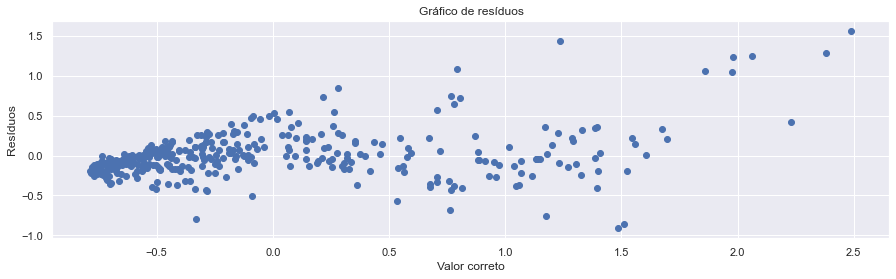

In [1031]:
# Gráfico de resíduos (diferença entre a predição e o valor verdadeiro esperado)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.scatter(y_test,y_test-y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor correto")
plt.ylabel("Resíduos")
plt.show()

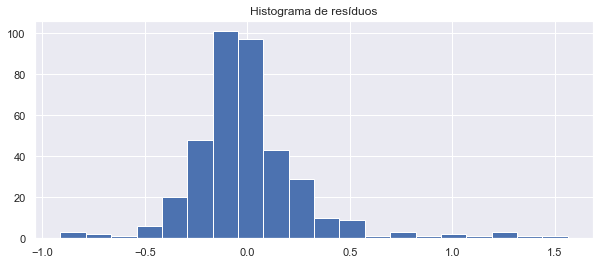

In [1032]:
plt.figure(figsize=(10,4))
plt.hist(y_test-y_pred, bins= 20)
plt.title("Histograma de resíduos")
plt.show()

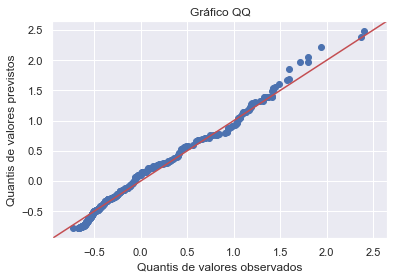

In [1033]:
## Gráfico QQ
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test,y_pred,line='45')
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()